In [25]:
import georinex as gr
import pymap3d as pm
from geopy.distance import lonlat, distance
import os
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
file_path = "~/GNSS/gnss-iot-server/DATA/EXP1/BASE/CONVBIN/rover_201911091804.obs"
file_path_nav = "~/GNSS/gnss-iot-server/DATA/EXP1/BASE/CONVBIN/rover_201911091804.nav"
file_path_sp3 = "~/GNSS/gnss-iot-server/DATA/Ephemerides/2078/igu20786_12.sp3"

In [4]:
obs = gr.load(file_path)
obs_df = obs.to_dataframe()
obs_df.head()   #L1: Phase measurements on L1
                #C1: Pseudorange using C/A-Code on L1

C1            L1
sv  time                                                  
G02 2019-11-09 18:04:58.999005  2.336456e+07  1.227815e+08
    2019-11-09 18:04:59.999005  2.336520e+07  1.227849e+08
    2019-11-09 18:05:00.999005  2.336584e+07  1.227882e+08
    2019-11-09 18:05:01.999005  2.336648e+07  1.227916e+08
    2019-11-09 18:05:02.999005  2.336712e+07  1.227950e+08

In [5]:
sats = []
j = 0
for i in range(len(obs_df.index.get_level_values('sv'))):
    if i == len(obs_df.index.get_level_values('sv'))-1:
        break
    elif i == 0:
        sats.append(obs_df.index.get_level_values('sv')[i])
    else:
        if obs_df.index.get_level_values('sv')[i] == obs_df.index.get_level_values('sv')[i+1]:
            pass
        else:
            sats.append(obs_df.index.get_level_values('sv')[i+1])
            j+=1
print(sats)

['G02', 'G05', 'G10', 'G12', 'G15', 'G20', 'G21', 'G24', 'G25', 'G29', 'G31', 'R05', 'R06', 'R09', 'R11', 'R16', 'R19', 'R20', 'R21']


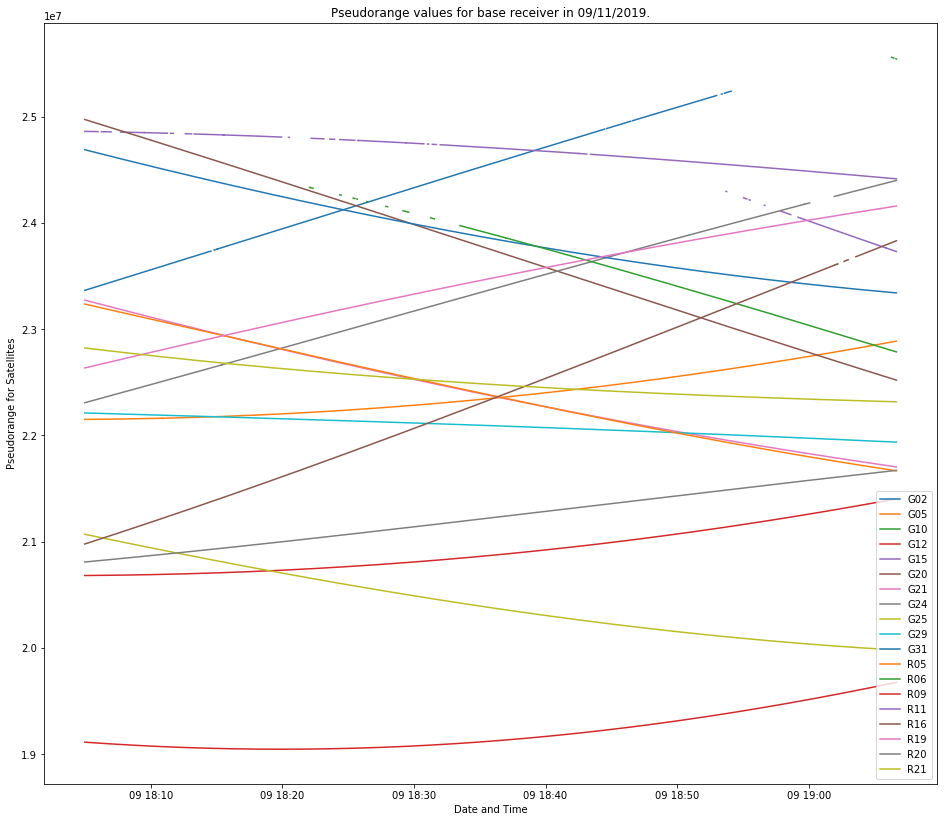

In [6]:
ax = figure(figsize=(16, 14)).gca()
ax.plot(obs.time, obs['C1'])
ax.legend(sats)
ax.set_xlabel('Date and Time')
ax.set_ylabel('Pseudorange for Satellites')
ax.set_title('Pseudorange values for base receiver in 09/11/2019.')
show()

In [7]:
nav = gr.load(file_path_nav)
nav_df = nav.to_dataframe()
nav_df.head()

SVclockBias  SVclockDrift  SVclockDriftRate  IODE  \
sv  time                                                                     
G02 2019-11-09 19:59:44          NaN           NaN               NaN   NaN   
    2019-11-09 20:00:00    -0.000343 -7.730705e-12               0.0  73.0   
G05 2019-11-09 19:59:44          NaN           NaN               NaN   NaN   
    2019-11-09 20:00:00    -0.000003 -4.547474e-13               0.0  23.0   
G12 2019-11-09 19:59:44          NaN           NaN               NaN   NaN   

                             Crs        DeltaN        M0       Cuc  \
sv  time                                                             
G02 2019-11-09 19:59:44      NaN           NaN       NaN       NaN   
    2019-11-09 20:00:00  38.3750  4.604478e-09  1.117249  0.000002   
G05 2019-11-09 19:59:44      NaN           NaN       NaN       NaN   
    2019-11-09 20:00:00 -25.1875  5.250219e-09 -2.619571 -0.000002   
G12 2019-11-09 19:59:44      NaN           NaN       NaN       NaN   

                         Eccentricity       Cus  ...          IDOT  CodesL2  \
sv  time                                         ...                          
G02 2019-11-09 19:59:44           NaN       NaN  ...           NaN      NaN   
    2019-11-09 20:00:00      0.019335  0.000010  ...  5.139500e-10      1.0   
G05 2019-11-09 19:59:44           NaN       NaN  ...           NaN      NaN   
    2019-11-09 20:00:00      0.005831  0.000004  ... -3.142988e-11      1.0   
G12 2019-11-09 19:59:44           NaN       NaN  ...           NaN      NaN   

                         GPSWeek  L2Pflag  SVacc  health           TGD  IODC  \
sv  time                                                                       
G02 2019-11-09 19:59:44      NaN      NaN    NaN     NaN           NaN   NaN   
    2019-11-09 20:00:00   2078.0      0.0    2.0     0.0 -1.769513e-08  73.0   
G05 2019-11-09 19:59:44      NaN      NaN    NaN     NaN           NaN   NaN   
    2019-11-09 20:00:00   2078.0      0.0    2.0     0.0 -1.117587e-08  23.0   
G12 2019-11-09 19:59:44      NaN      NaN    NaN     NaN           NaN   NaN   

                         TransTime  FitIntvl  
sv  time                                      
G02 2019-11-09 19:59:44        NaN       NaN  
    2019-11-09 20:00:00   583506.0       4.0  
G05 2019-11-09 19:59:44        NaN       NaN  
    2019-11-09 20:00:00   583506.0       4.0  
G12 2019-11-09 19:59:44        NaN       NaN  

[5 rows x 29 columns]

In [8]:
sp3 = gr.load(file_path_sp3)
sp3.ECEF[0]

<xarray.DataArray 'ECEF' ()>
array('x', dtype='<U1')
Coordinates:
    ECEF     <U1 'x'

In [9]:
sp3_df = sp3.to_dataframe()
sp3_df.head()

position       clock
ECEF sv  time                                         
x    G01 2019-11-08 12:00:00  20010.934584 -190.315009
         2019-11-08 12:15:00  18712.731441 -190.326480
         2019-11-08 12:30:00  17150.836087 -190.337959
         2019-11-08 12:45:00  15348.804968 -190.349418
         2019-11-08 13:00:00  13337.501924 -190.361020

In [10]:
sats_eph = []
j = 0
for i in range(len(sp3_df.index.get_level_values('sv'))):
    if i == len(sp3_df.index.get_level_values('sv')):
        break
    elif i == 0:
        sats_eph.append(sp3_df.index.get_level_values('sv')[i])
    else:
        if sp3_df.index.get_level_values('sv')[i] == sp3_df.index.get_level_values('sv')[i+1]:
            pass
        else:
            if len(sats_eph) == 31:
                break
            else:
                sats_eph.append(sp3_df.index.get_level_values('sv')[i+1])
                j+=1

print(sats_eph)

['G01', 'G02', 'G03', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G30', 'G31', 'G32']


In [11]:
totalAxis_data = int(len(sp3_df.index.get_level_values('sv'))/(3*len(sats_eph)))
print(totalAxis_data)   

192


In [12]:
space = int(len(sp3_df.index.get_level_values('sv'))/3)

In [13]:
x = []
y = []
z = []
for i in range(space):
    x.append(sp3_df['position'][i])
    y.append(sp3_df['position'][space + i])
    z.append(sp3_df['position'][space * 2 + i])

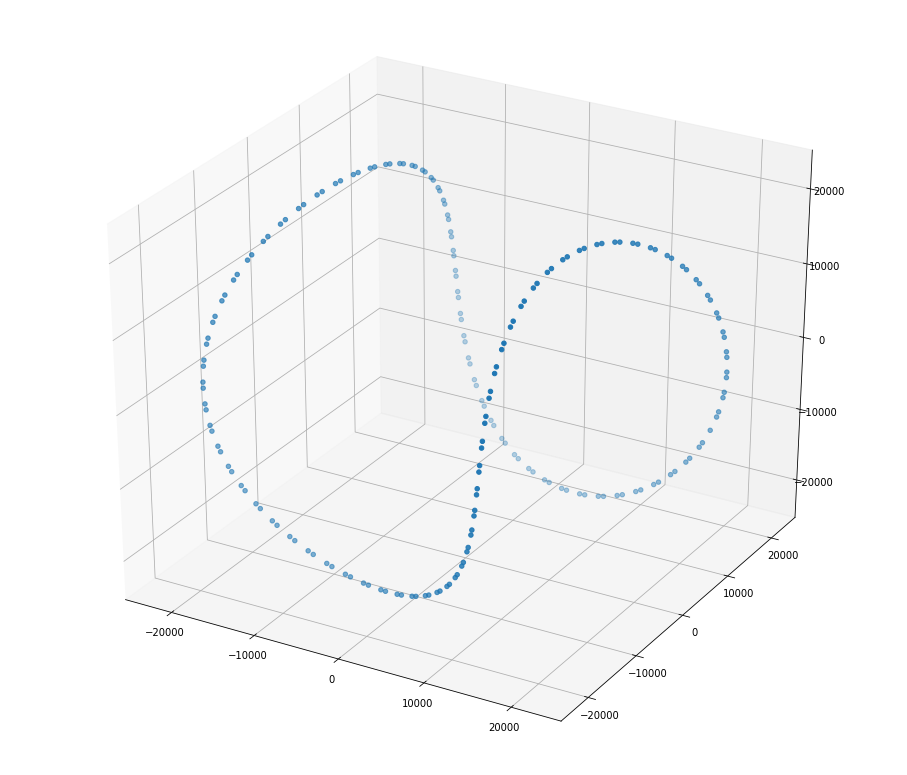

In [14]:
bx = figure(figsize=(16, 14)).gca(projection='3d')
bx.scatter(x[:totalAxis_data-1], y[:totalAxis_data-1], z[:totalAxis_data-1])
#bx.legend(sats)
#bx.set_xlabel('Date and Time')
#bx.set_ylabel('Pseudorange for Satellites')
#bx.set_title('Pseudorange values for base receiver in 09/11/2019.')
show()

In [15]:
r = len(sats_eph)
colors = list(np.random.rand(r,3))
colors

[array([0.03832303, 0.66293114, 0.37061516]),
 array([0.9555876 , 0.93327774, 0.3213469 ]),
 array([0.3774502 , 0.17841709, 0.99697547]),
 array([0.4381715 , 0.04953315, 0.07357886]),
 array([0.34318113, 0.07588241, 0.68119603]),
 array([0.01284657, 0.50028498, 0.87708729]),
 array([0.64979195, 0.24492222, 0.18680361]),
 array([0.46819819, 0.07474718, 0.91796095]),
 array([0.06982592, 0.97900306, 0.35424307]),
 array([0.59001718, 0.62031863, 0.04381655]),
 array([0.07692037, 0.70738087, 0.06972859]),
 array([0.27013025, 0.85704065, 0.19776137]),
 array([0.8852699 , 0.65346916, 0.00889471]),
 array([0.04836141, 0.61828742, 0.30947207]),
 array([0.26800692, 0.94584423, 0.99624398]),
 array([0.75219356, 0.19793303, 0.79532653]),
 array([0.96951543, 0.20203444, 0.60453853]),
 array([0.95754373, 0.84514371, 0.90397215]),
 array([0.7239972 , 0.41258914, 0.75476573]),
 array([0.62198792, 0.25203788, 0.09709725]),
 array([0.03193128, 0.06959877, 0.035344  ]),
 array([0.93371467, 0.56829493, 0.

In [16]:
n = np.arange(0.0 , float(len(sats_eph)))
lista = list(zip(colors, n))
print(lista)

[(array([0.03832303, 0.66293114, 0.37061516]), 0.0), (array([0.9555876 , 0.93327774, 0.3213469 ]), 1.0), (array([0.3774502 , 0.17841709, 0.99697547]), 2.0), (array([0.4381715 , 0.04953315, 0.07357886]), 3.0), (array([0.34318113, 0.07588241, 0.68119603]), 4.0), (array([0.01284657, 0.50028498, 0.87708729]), 5.0), (array([0.64979195, 0.24492222, 0.18680361]), 6.0), (array([0.46819819, 0.07474718, 0.91796095]), 7.0), (array([0.06982592, 0.97900306, 0.35424307]), 8.0), (array([0.59001718, 0.62031863, 0.04381655]), 9.0), (array([0.07692037, 0.70738087, 0.06972859]), 10.0), (array([0.27013025, 0.85704065, 0.19776137]), 11.0), (array([0.8852699 , 0.65346916, 0.00889471]), 12.0), (array([0.04836141, 0.61828742, 0.30947207]), 13.0), (array([0.26800692, 0.94584423, 0.99624398]), 14.0), (array([0.75219356, 0.19793303, 0.79532653]), 15.0), (array([0.96951543, 0.20203444, 0.60453853]), 16.0), (array([0.95754373, 0.84514371, 0.90397215]), 17.0), (array([0.7239972 , 0.41258914, 0.75476573]), 18.0), (a

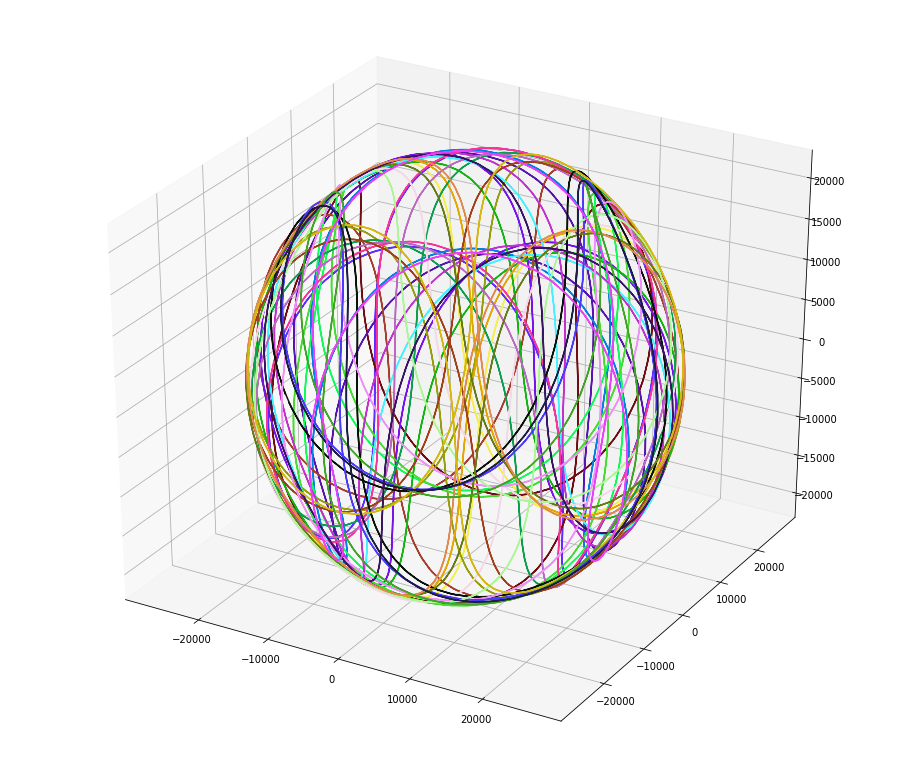

In [17]:
cx = figure(figsize=(16, 14)).gca(projection='3d')
for c, i in list(zip(colors, range(len(sats_eph)))):
    
    cx.plot(x[totalAxis_data * (i - 1):totalAxis_data * i], y[totalAxis_data * (i - 1):totalAxis_data * i], 
            z[totalAxis_data * (i - 1):totalAxis_data * i], c = c)

show()

In [ ]:
#for angle in range(70,210,2):
    #cx.view_init(30,angle)
    #filename='Orbit' + str(angle) + '.png'
    #plt.savefig(filename, dpi=96)
    #plt.gca()

In [40]:
#Tratamento da Solução da Base
fileBase = "~/GNSS/gnss-iot-server/DATA/EXP1/BASE/RNXRTKP/sol1_201911091804.pos"
pos_file = open(os.path.dirname(fileBase))
for line in file.read():
    print(line)

FileNotFoundError: [Errno 2] No such file or directory: '~/GNSS/gnss-iot-server/DATA/EXP1/BASE/RNXRTKP'